In [1]:
%matplotlib inline


# Structural similarity index

When comparing images, the mean squared error (MSE)--while simple to
implement--is not highly indicative of perceived similarity.  Structural
similarity aims to address this shortcoming by taking texture into account
[1]_, [2]_.

The example shows two modifications of the input image, each with the same MSE,
but with very different mean structural similarity indices.

.. [1] Zhou Wang; Bovik, A.C.; ,"Mean squared error: Love it or leave it? A new
       look at Signal Fidelity Measures," Signal Processing Magazine, IEEE,
       vol. 26, no. 1, pp. 98-117, Jan. 2009.

.. [2] Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, "Image quality
       assessment: From error visibility to structural similarity," IEEE
       Transactions on Image Processing, vol. 13, no. 4, pp. 600-612,
       Apr. 2004.


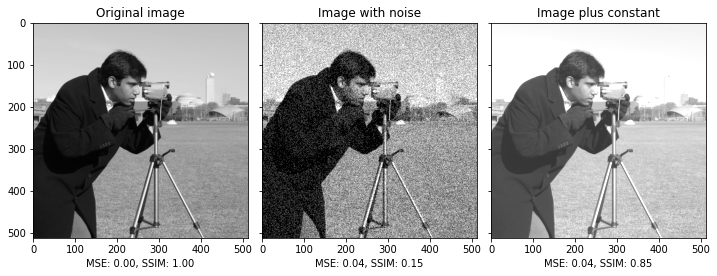

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = img_as_float(data.camera())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()

In [3]:
import cv2

In [23]:
test_image = cv2.imread("../datainput/tip2.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (640, 480))
test_image = test_image.squeeze()

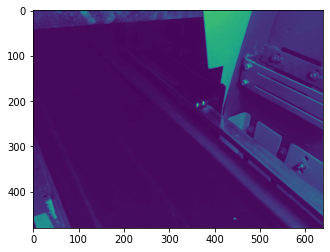

In [24]:
plt.imshow(test_image)

In [25]:
ssim(test_image,test_image,data_range = test_image.max() - test_image.min() )

1.0

In [29]:
ref_image = cv2.imread("../datainput/uv.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
ref_image = cv2.resize(ref_image, (640, 480))
ref_image = ref_image.squeeze()
ssim(ref_image,test_image,data_range = test_image.max() - test_image.min() )


0.4556905023439093

In [17]:
ref_image = cv2.imread("../datainput/uv.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
ref_image = cv2.resize(ref_image, (640, 480))
ref_image = ref_image.squeeze()
ssim(ref_image,test_image,data_range = ref_image.max() - ref_image.min() )

0.46448087276712974

In [18]:
ref_image = cv2.imread("../datainput/uv.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
ref_image = cv2.resize(ref_image, (640, 480))
ref_image = ref_image.squeeze()
mean_squared_error(ref_image,test_image)

278.021630859375

In [34]:
ref_image = cv2.imread("../datainput/uv.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
ref_image = cv2.resize(ref_image, (640, 480))
ref_image = ref_image.squeeze()
mean_squared_error(ref_image,test_image)

278.021630859375

In [40]:
ref_image = cv2.imread("../datainput/uv.jpg")
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
ref_image = cv2.resize(ref_image, (640, 480))
hist1 = cv2.calcHist([ref_image],[0],None,[256],[0,256])
hist2 = cv2.calcHist([test_image],[0],None,[256],[0,256])
ref_image = ref_image.squeeze()
# mean_squared_error(ref_image,test_image)
cv2.compareHist(hist1,hist2,cv2.HISTCMP_BHATTACHARYYA)

0.5620861810481159

In [43]:
# importing packages
import cv2
import matplotlib.pyplot as plt

# reading image using the imread() function
img1 = cv2.imread('../datainput/tip2.jpg')
img1 = cv2.resize(img1, (640, 480))
img2 = cv2.imread('../datainput/tip3.jpg')
img2 = cv2.resize(img2, (640, 480))

# input image is converted to gray scale image
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


features = cv2.SIFT_create()






In [44]:
keypoints1,descriptors1 = features.detectAndCompute(img1, None)
keypoints2,descriptors2 = features.detectAndCompute(img2, None)

In [45]:
print(len(keypoints1),len(keypoints2))

64 139


In [46]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptors1,descriptors2)
print(len(matches))


38


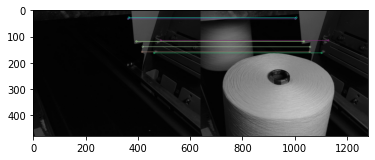

(<matplotlib.image.AxesImage at 0x7f2419942280>, None)

In [49]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,keypoints1,img2,keypoints2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()